In [66]:
import numpy as np

#read txt
amazon = open('C:/Users/james/sentiment labelled sentences/amazon_cells_labelled.txt',"r",encoding="utf-8")
imdb = open('C:/Users/james/sentiment labelled sentences/imdb_labelled.txt',"r",encoding="utf-8")
yelp = open('C:/Users/james/sentiment labelled sentences/yelp_labelled.txt',"r",encoding="utf-8")
data = []
data1 = list(amazon)
data1 += (list(imdb))
data1 += (list(yelp))
#convert to list
for i in data1:
    x = i.split('\t')
    k = x[1].split('\n')    
    data.append([x[0],int(k[0])])

print(len(data))
print(data[:10])


3000
[['So there is no way for me to plug it in here in the US unless I go by a converter.', 0], ['Good case, Excellent value.', 1], ['Great for the jawbone.', 1], ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 0], ['The mic is great.', 1], ['I have to jiggle the plug to get it to line up right to get decent volume.', 0], ['If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 0], ['If you are Razr owner...you must have this!', 1], ['Needless to say, I wasted my money.', 0], ['What a waste of money and time!.', 0]]


In [112]:
import pandas as pd
import helpers.data_mining_helpers as dmh

data = np.array(data)

df = pd.DataFrame({'sentence': data[:,0],
                   'score': data[:,1],})
print(df)

                                               sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
...                                                 ...   ...
2995  I think food should have flavor and texture an...     0
2996                           Appetite instantly gone.     0
2997  Overall I was not impressed and would not go b...     0
2998  The whole experience was underwhelming, and I ...     0
2999  Then, as if I hadn't wasted enough of my life ...     0

[3000 rows x 2 columns]


In [113]:
df.iloc[::100, 0:2][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
100,Integrated seamlessly with the Motorola RAZR p...,1
200,The color is even prettier than I thought it w...,1
300,Sending it back.,0
400,what a disappointment,0
500,"The bose noise cancelling is amazing, which is...",1
600,Their Research and Development division obviou...,1
700,"Also, the phone doesn't seem to accept anythin...",0
800,"Good , works fine.",1
900,"This was utterly confusing at first, which cau...",0


In [114]:
df.loc[::50, 'sentence'][0:10]

0      So there is no way for me to plug it in here i...
50     Not loud enough and doesn't turn on like it sh...
100    Integrated seamlessly with the Motorola RAZR p...
150                               I Was Hoping for More.
200    The color is even prettier than I thought it w...
250    It's fits like a glove and is strong, secure, ...
300                                     Sending it back.
350                             Were JERKS on the phone.
400                                what a disappointment
450    i'm glad i found this product on amazon it is ...
Name: sentence, dtype: object

In [115]:
df.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [116]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [117]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])
dummy_series

sentence    dummy_record
dtype: object

In [118]:
result = df.append(dummy_series, ignore_index=True)
result.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [119]:
result.dropna(inplace=True)
result.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [120]:
print(sum(df.duplicated('sentence')))
print(len(df))


17
3000


In [122]:
df.drop_duplicates(keep='first', inplace=True) # keep first
print(len(df))

2983


In [123]:
df_sample = df.sample(n=1000)
print(len(df_sample))

1000


In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

print(df.score.value_counts())

0    1493
1    1490
Name: score, dtype: int64


<AxesSubplot:title={'center':'score distribution'}>

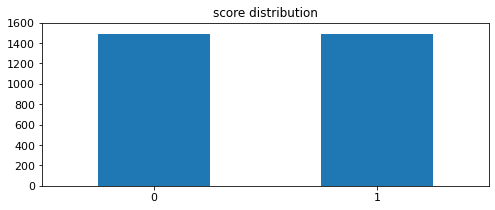

In [126]:
df.score.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    523
0    477
Name: score, dtype: int64


<AxesSubplot:title={'center':'score distribution'}>

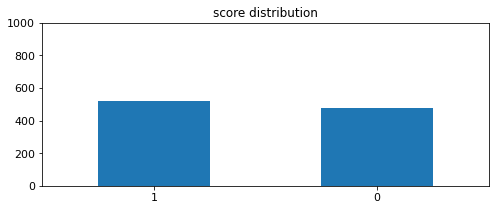

In [128]:
print(df_sample.score.value_counts())
df_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [131]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]                                

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [134]:
df[:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [140]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

In [138]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(df[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [142]:
print(df_counts.shape)
count_vect.get_feature_names()[0:10]

(2983, 5155)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [143]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [152]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]

In [153]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320',
 'term_54',
 'term_5lb',
 'term_680',
 'term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 '

In [154]:
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:5]]
plot_z = df_counts[0:5, 0:100].toarray()

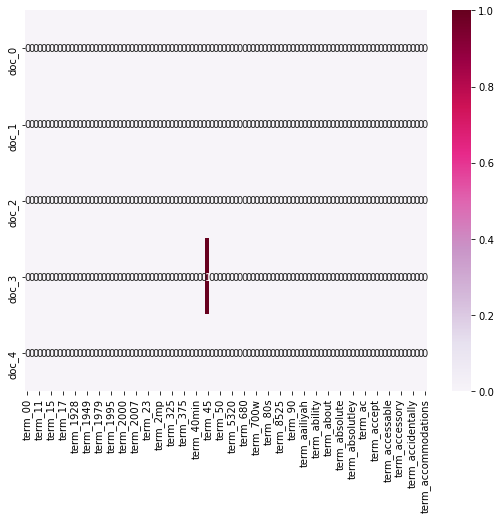

In [155]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [157]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2983, 2)

In [162]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [163]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0]

1

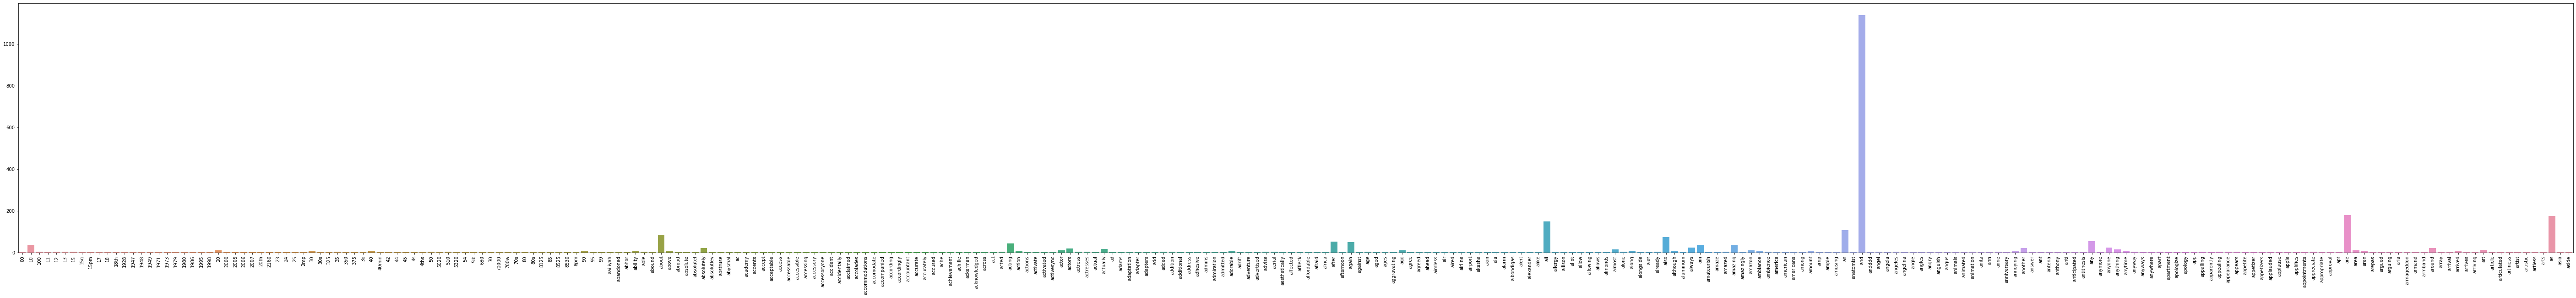

In [164]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [166]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(df.score)
mlb.classes_

array(['0', '1'], dtype='<U1')

In [168]:
df['bin_score'] = mlb.transform(df['score']).tolist()
df[0:9]

,sentence,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
